In [6]:
import pandas as pd

# Load the COVID-19 dataset from the web
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

# Preview the first few rows
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [7]:
# Check info
df.info()

# Drop rows with missing country names
df = df.dropna(subset=['location'])

# Filter out global aggregates (optional)
df = df[~df['location'].str.contains('income|World|International')]

# Focus on relevant columns
df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']]

# Convert date
df['date'] = pd.to_datetime(df['date'])

# Check again
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
count,416005,4.034340e+05,4.017890e+05,4.034340e+05,402238.000000,7.901500e+04
mean,2022-04-19 01:51:14.112090368,3.972707e+06,4.324889e+03,4.324617e+04,38.248147,2.629133e+08
min,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2021-03-01 00:00:00,5.980000e+03,0.000000e+00,4.100000e+01,0.000000,1.683634e+06
50%,2022-04-18 00:00:00,5.835400e+04,0.000000e+00,7.060000e+02,0.000000,1.141826e+07
75%,2023-06-07 00:00:00,6.670940e+05,0.000000e+00,8.612000e+03,0.000000,8.046511e+07
max,2024-08-14 00:00:00,3.014991e+08,4.214242e+07,2.102483e+06,60413.000000,9.104305e+09
std,NaN,2.109728e+07,1.404929e+05,1.941277e+05,672.885177,1.043088e+09


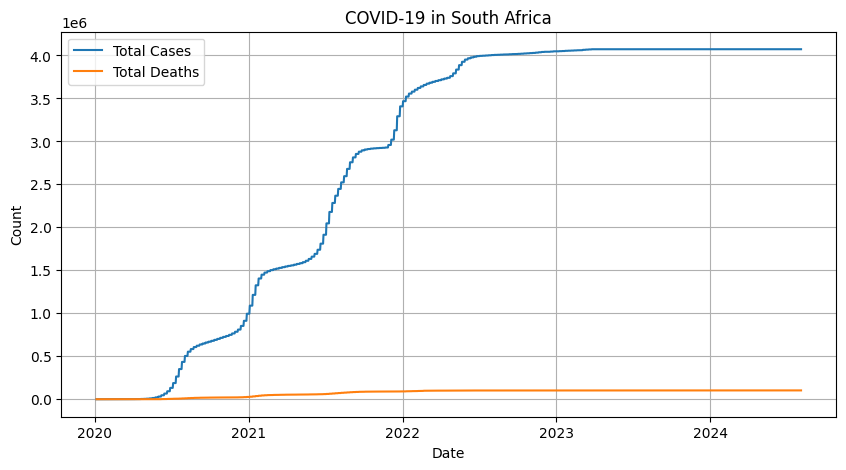

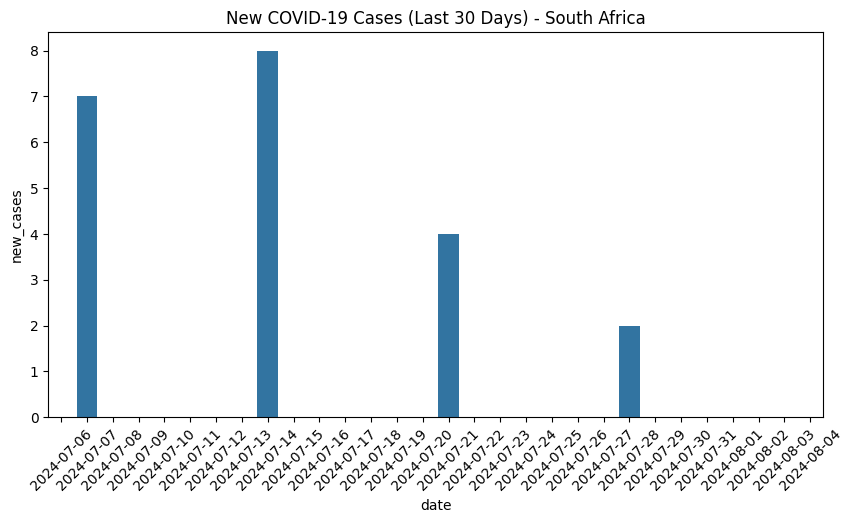

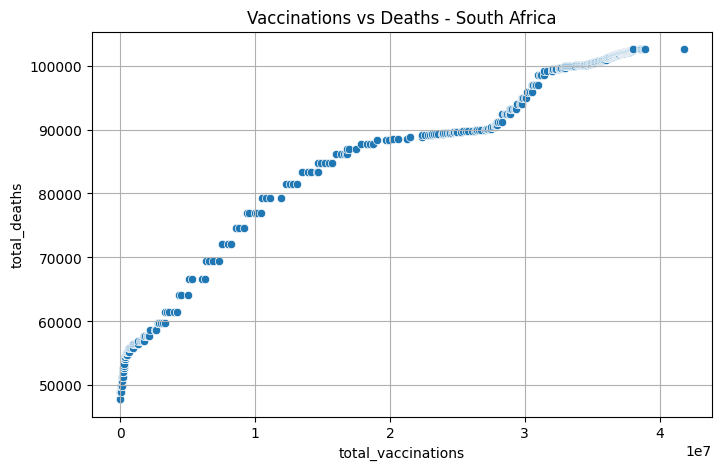

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Focus on one country (e.g., South Africa)
za = df[df['location'] == 'South Africa']

# Line plot: Total cases over time
plt.figure(figsize=(10, 5))
plt.plot(za['date'], za['total_cases'], label='Total Cases')
plt.plot(za['date'], za['total_deaths'], label='Total Deaths')
plt.title('COVID-19 in South Africa')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Bar chart: New cases
plt.figure(figsize=(10, 5))
sns.barplot(x='date', y='new_cases', data=za[-30:])
plt.xticks(rotation=45)
plt.title('New COVID-19 Cases (Last 30 Days) - South Africa')
plt.show()

# Scatter: Vaccinations vs Deaths
plt.figure(figsize=(8, 5))
sns.scatterplot(data=za, x='total_vaccinations', y='total_deaths')
plt.title('Vaccinations vs Deaths - South Africa')
plt.grid(True)
plt.show()

In [9]:
# Death rate
za['death_rate'] = za['total_deaths'] / za['total_cases'] * 100
print("Latest Death Rate:", round(za['death_rate'].dropna().iloc[-1], 2), "%")

# Vaccination coverage
print("Latest Total Vaccinations:", int(za['total_vaccinations'].dropna().iloc[-1]))

Latest Death Rate: 2.52 %
Latest Total Vaccinations: 41798812


<ipython-input-9-12e8da260006>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  za['death_rate'] = za['total_deaths'] / za['total_cases'] * 100


 Load and Preview Data

Clean and Prepare Data

 Exploratory Data Analysis

Insights and Conclusions

